# BIOS 512 Data Visualization- Women In STEM

## Data: College Majors by Gender
For this data visualization, a dataset containing information about the gender distribution of different college majors and major areas was obtained from the FiveThirtyEight Github. The dataset (women-stem.csv) contains a list of college majors with their more generalized associated major categories (Engineering, Physical Sciences, Computers & Mathematics, Health, Biology & Life Science), which are from Carnevale et al, "What's It Worth?: The Economic Value of College Majors." Georgetown University Center on Education and the Workforce, 2011. http://cew.georgetown.edu/whatsitworth. The dataset also contains information from the American Community Survey 2010-2012 Public Use Microdata Series regarding the total number of men and women in each major during this time frame, as well as a column indicating the proportion of women in each major (ShareWomen). A preview of this dataset is shown below:

In [74]:
library('tidyverse')
library(forcats)

df = read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')
head(df)

Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<int>
1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.1205643,110000
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.1018519,75000
3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.1530374,73000
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.1073132,70000
5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.1449670,65000
6,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.3416305,65000


## Data Cleaning (Visualization #1)
To further analyze the gender distribution of different collge major categories, it was necessary to create a column containing the proportion of men in each major (ShareMen). In addition, the dataset was grouped by major category and the average percentage of men and women in each major category was calculated, creating the Total_Men and Total_Women columns, labled as "Female Students" and "Male Students". The final dataset used for the visualization contained only the Major_Category, Total_Women, and Total_Men columns, as shown below.

In [75]:
#Create ShareMen Column (Proportion of Men by Major)
df$ShareMen <- with(df,(Men / Total))

#DATA CLEANING: MAJOR CATEGORY BY GENDER (AVERAGE PROPORTION OF MEN vs. WOMEN by MAJOR CATEGORY)
df = df %>% group_by(Major_category)  %>% summarise(Total_Women = (mean(ShareWomen)*100), Total_Men = (mean(ShareMen)*100))


names(df)[2] <- "Female Students"
names(df)[3] <- "Male Students"
head(df)

Major_category,Female Students,Male Students
<fct>,<dbl>,<dbl>
Biology & Life Science,58.71929,41.28071
Computers & Mathematics,31.17722,68.82278
Engineering,23.88887,76.11113
Health,79.51519,20.48481
Physical Sciences,50.86834,49.13166


## Which Major Categories Have the Most Women?
As shown below, women tend to dominate the health field while the the fields of engineering and computer science & mathematics are largely dominanted by male students.

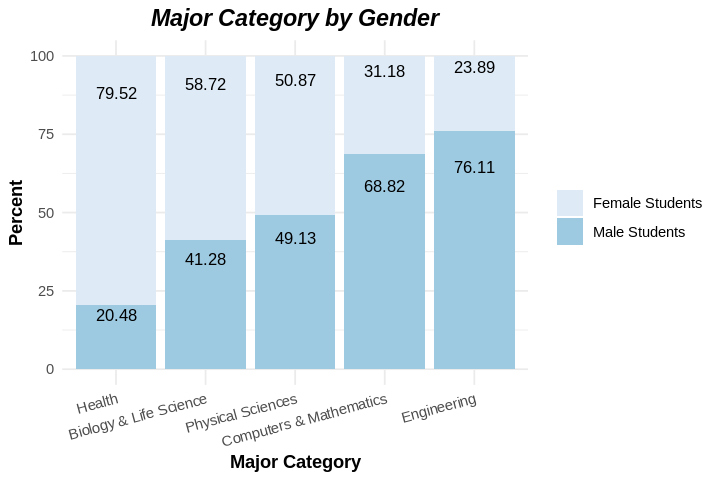

In [76]:
#PLOT OF MAJOR CATEGORY BY GENDER (AVERAGE PROPORTION OF MEN vs. WOMEN)
options(repr.plot.width=6, repr.plot.height=4)
p2 = ggplot(data = df %>% gather(Variable, value, -Major_category), 
       aes(x = reorder(Major_category, value), y = value, fill = Variable, some_dummy_mapping = value[Variable])) + geom_bar(stat = 'identity', position = 'stack')
p2 = p2 +  theme(panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank()) 
p2 = p2 + xlab("Major Category") + ylab("Percent") + ggtitle("Major Category by Gender") +  geom_text(aes(label=sprintf("%0.2f", round(value, digits = 2))), position= position_stack(vjust = 0.85), size=3.5) + scale_fill_brewer(palette="Blues") + theme_minimal()+ theme(axis.text.x = element_text(angle = 15, hjust = 1)) + theme(plot.title = element_text(hjust = 0.5)) + theme(legend.title = element_blank())

p2 = p2 + theme(plot.title = element_text(size=14, face="bold.italic"), axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold")) 
p2

## Data Cleaning (Visualization #2)
Each of these major categories consists of many majors. To further examine which specific college majors are most popular amongst female students and male students, I subsetted the data to only contain the top 10 college majors with the highest proportion of female students as well as the top 10 college majors with the highest proportion of male students. Barplots showing the gender distributions for these majors are shown below.

## Top Women's College Majors

In [77]:
#COLLEGE MAJORS WITH HIGHEST PROPORTION OF WOMEN 
df = read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')

df2 = df %>% 
    select(ShareWomen, Major) %>% 
    mutate(ShareMen = 1 - ShareWomen) %>%
    gather(key, value, -Major) %>%
    arrange(desc(key), desc(value)) %>%
    mutate(Major = fct_inorder(Major))

topN = df2 %>%
    filter(key == 'ShareWomen') %>%
    top_n(10, wt = value) %>%
    pull(Major) %>%
    as.character()

df3 = df2 %>%
    filter(Major %in% topN)

print(topN)

Parsed with column specification:
cols(
  Rank = col_double(),
  Major_code = col_double(),
  Major = col_character(),
  Major_category = col_character(),
  Total = col_double(),
  Men = col_double(),
  Women = col_double(),
  ShareWomen = col_double(),
  Median = col_double()
)


 [1] "COMMUNICATION DISORDERS SCIENCES AND SERVICES"             
 [2] "MEDICAL ASSISTING SERVICES"                                
 [3] "NURSING"                                                   
 [4] "MISCELLANEOUS HEALTH MEDICAL PROFESSIONS"                  
 [5] "NUTRITION SCIENCES"                                        
 [6] "COMMUNITY AND PUBLIC HEALTH"                               
 [7] "GENERAL MEDICAL AND HEALTH SERVICES"                       
 [8] "HEALTH AND MEDICAL ADMINISTRATIVE SERVICES"                
 [9] "MEDICAL TECHNOLOGIES TECHNICIANS"                          
[10] "NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL TECHNOLOGIES"


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


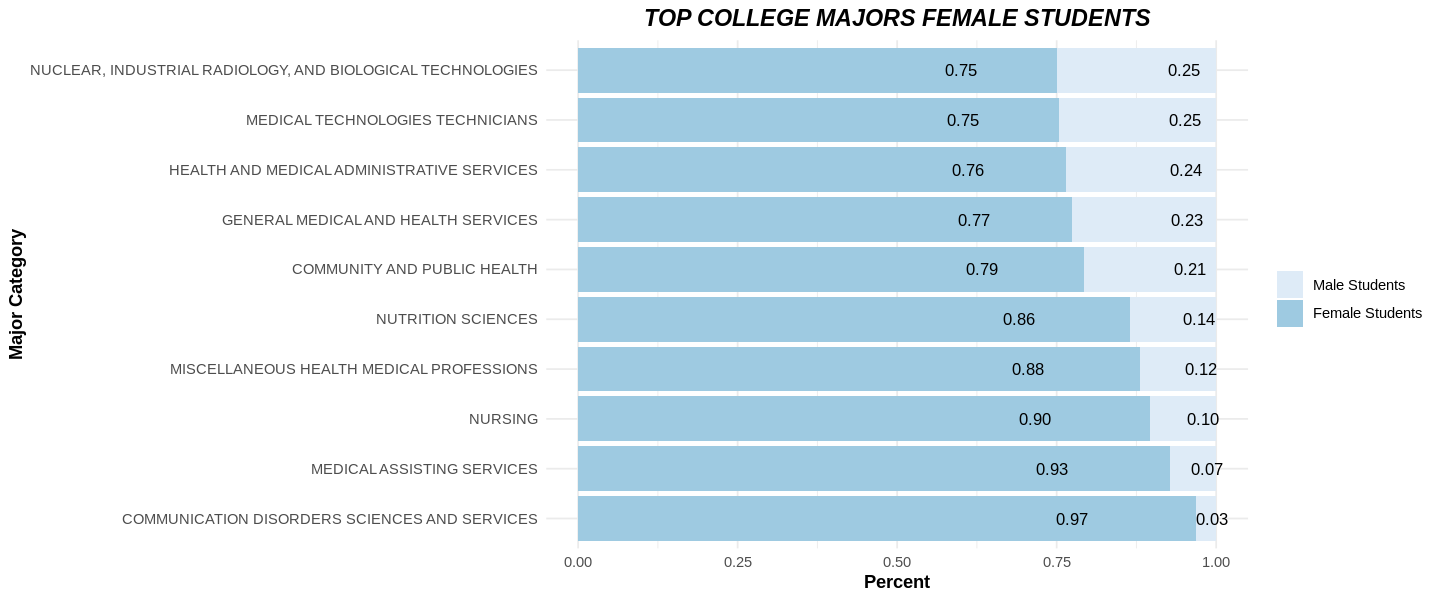

In [78]:
options(repr.plot.width = 12, repr.plot.height = 5)
p3 = ggplot(df3, aes(x = Major, y = value, fill = key))

p3 = p3 + geom_bar(stat = 'identity') + coord_flip()

p3 = p3 +  theme(panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank()) 

p3 = p3 + xlab("Major Category") + ylab("Percent") + 
ggtitle("TOP COLLEGE MAJORS FEMALE STUDENTS") +  
geom_text(aes(label=sprintf("%0.2f", round(value, digits = 2))), position= position_stack(vjust = 0.8), size=3.5) + 
scale_fill_brewer(palette="Blues", labels=c("Male Students", "Female Students")) + 
theme_minimal()+ theme(plot.title = element_text(hjust = 0.5)) + theme(legend.title = element_blank()) + coord_flip()

p3 = p3 + theme(plot.title = element_text(size=14, face="bold.italic"), axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold")) 

p3

## Top Men's College Majors

In [79]:
#COLLEGE MAJORS WITH HIGHEST PROPORTION OF MEN
df = read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')

df2 = df %>% mutate(ShareMen = 1 - ShareWomen) %>%
    select(ShareMen, ShareWomen,Major) %>% 
    gather(key, value, -Major) %>%
    arrange(desc(key), desc(value)) %>%
    mutate(Major = fct_inorder(Major))

topN = df2 %>%
    filter(key == 'ShareMen') %>%
    top_n(10, wt = value) %>%
    pull(Major) %>%
    as.character()

df3 = df2 %>%
    filter(Major %in% topN)

print(topN)

Parsed with column specification:
cols(
  Rank = col_double(),
  Major_code = col_double(),
  Major = col_character(),
  Major_category = col_character(),
  Total = col_double(),
  Men = col_double(),
  Women = col_double(),
  ShareWomen = col_double(),
  Median = col_double()
)


 [1] "MECHANICAL ENGINEERING RELATED TECHNOLOGIES"
 [2] "MINING AND MINERAL ENGINEERING"             
 [3] "NAVAL ARCHITECTURE AND MARINE ENGINEERING"  
 [4] "MECHANICAL ENGINEERING"                     
 [5] "PETROLEUM ENGINEERING"                      
 [6] "AEROSPACE ENGINEERING"                      
 [7] "NUCLEAR ENGINEERING"                        
 [8] "METALLURGICAL ENGINEERING"                  
 [9] "ENGINEERING AND INDUSTRIAL MANAGEMENT"      
[10] "MATHEMATICS AND COMPUTER SCIENCE"           


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


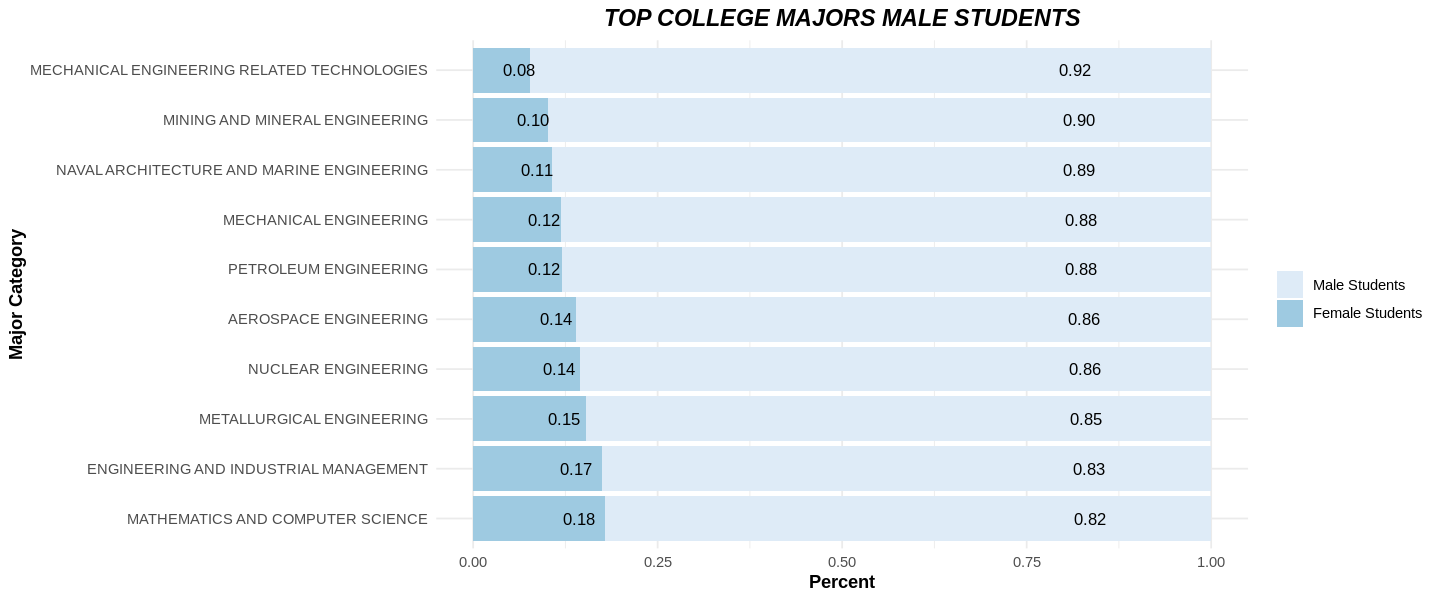

In [80]:
options(repr.plot.width = 12, repr.plot.height = 5)
p4 = ggplot(df3, aes(x = Major, y = value, fill = key))

p4 = p4 + geom_bar(stat = 'identity') + coord_flip()
p4 = p4 +  theme(panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank()) 

p4 = p4 + xlab("Major Category") + ylab("Percent") + 
ggtitle("TOP COLLEGE MAJORS MALE STUDENTS") +  
geom_text(aes(label=sprintf("%0.2f", round(value, digits = 2))), 
          position= position_stack(vjust = 0.8), size=3.5) + 
scale_fill_brewer(palette="Blues", labels=c("Male Students", "Female Students")) + 
theme_minimal()+ theme(plot.title = element_text(hjust = 0.5)) + theme(legend.title = element_blank()) + coord_flip()

p4 = p4 + theme(plot.title = element_text(size=14, face="bold.italic"), axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold")) 

p4